<a href="https://colab.research.google.com/github/yudy4431/NLP_WSDM_Fake_News_Classification/blob/main/NLP_WSDM_Fake_News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# It's a competiton on Kaggle which attempts to classify fake news.
# The code and idea in this notebook are refer to this article:"https://reurl.cc/ZQGeQQ".

In [3]:
from google.colab import drive
# Linked to google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd

train_path = "/content/gdrive/MyDrive/Colab_Notebooks/WSDM_Fake_News_Classification/train.csv"
test_path = "/content/gdrive/MyDrive/Colab_Notebooks/WSDM_Fake_News_Classification/test.csv"

train = pd.read_csv(train_path, index_col=0)
train.head(3)

# Because english titles were translated from chinese, those couldn't express completed meanings,
# I decide to drop "title1_en" and "title2_en".
# The English titles are machine translated from the related Chinese titles. 
# This may help participants from all background to get better understanding of the datasets. 
# Participants are highly recommended to use the Chinese version titles to finish the task.

cols = ['title1_zh', 'title2_zh', 'label']
train = train.loc[:, cols]

print("After drops english title cols.")
train.head(3)

After drops english title cols.


,title1_zh,title2_zh,label
id,,,
0,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,unrelated
3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,unrelated
1,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",GDP首超香港？深圳澄清：还差一点点……,unrelated


In [5]:
# Word segmentation processing.
# Splits words by meanings.
# Use Jieba to split the title by words' meaning.
import jieba.posseg as pseg

def jieba_tokenizer(text):
  """
  Input(string): A sequence of title.
  Output(string): A string after processing by Jieba and drop the flag. 
  """
  words = pseg.cut(text)
  return ' '.join([word for word, flag in words if flag != 'x'])

In [ ]:
# Make new tokenized cols by title1 and title2 and apply function jieba_tokenizer.
# Tips: If it runs "AttributeError: 'float' object has no attribute 'decode'",
#       try to astype the cols to str type.
train['title1_tokenized'] = train.loc[:, 'title1_zh'].astype(str).apply(jieba_tokenizer)
train['title2_tokenized'] = train.loc[:, 'title2_zh'].astype(str).apply(jieba_tokenizer)

In [8]:
train.iloc[:, [0, 3]].head()

,title1_zh,title1_tokenized
id,,
0,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,2017 养老保险 又 新增 两项 农村 老人 人人 可 申领 你 领到 了 吗
3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
1,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
2,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
9,"""用大蒜鉴别地沟油的方法,怎么鉴别地沟油",用 大蒜 鉴别 地沟油 的 方法 怎么 鉴别 地沟油


In [9]:
train.iloc[:, [1, 4]].head()

,title2_zh,title2_tokenized
id,,
0,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,警方 辟谣 鸟巢 大会 每人 领 5 万 仍 有 老人 坚持 进京
3,深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,深圳 GDP 首 超 香港 深圳 统计局 辟谣 只是 差距 在 缩小
1,GDP首超香港？深圳澄清：还差一点点……,GDP 首 超 香港 深圳 澄清 还 差 一点点
2,去年深圳GDP首超香港？深圳统计局辟谣：还差611亿,去年 深圳 GDP 首 超 香港 深圳 统计局 辟谣 还 差 611 亿
9,吃了30年食用油才知道，一片大蒜轻松鉴别地沟油,吃 了 30 年 食用油 才 知道 一片 大蒜 轻松 鉴别 地沟油


In [11]:
# Make a index dictionary of corpus.

import keras

# If the amounts of words more than 10000, the new word will be defined Unknown.
MAX_NUM_WORDS = 10000  

tokenizer = keras.preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS)
# Combined title1_tokenized and title2_tokenized to a corpus.
# Pandas concat: a sequence or mapping of Series or DataFrame objects.
# train.title1_tokenized is Series.
corpus_x1 = train.title1_tokenized
corpus_x2 = train.title2_tokenized
corpus = pd.concat([corpus_x1, corpus_x2])
corpus.shape

(641104,)

In [12]:
pd.DataFrame(corpus.iloc[:5],columns=['title'])

,title
id,
0,2017 养老保险 又 新增 两项 农村 老人 人人 可 申领 你 领到 了 吗
3,你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
1,你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
2,你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
9,用 大蒜 鉴别 地沟油 的 方法 怎么 鉴别 地沟油


In [13]:
# Call tokenizer to fit corpus and look up all words.
tokenizer.fit_on_texts(corpus)

In [14]:
#  Use the dictionary we did before to transform
#  texts of news title A and news title B from str to indexs, repectively.
x1_train = tokenizer.texts_to_sequences(corpus_x1)
x2_train = tokenizer.texts_to_sequences(corpus_x2)

# Demo.
print(len(x1_train))
print(x1_train[:1])

for seq in x1_train[:1]:
    print([tokenizer.index_word[idx] for idx in seq])

320552
[[217, 1268, 32, 1178, 5967, 25, 489, 2877, 116, 5559, 4, 1850, 2, 13]]
['2017', '养老保险', '又', '新增', '两项', '农村', '老人', '人人', '可', '申领', '你', '领到', '了', '吗']


In [15]:
# Because there are different length of sentenses, we need to zero-padding with fixed sequence length.

MAX_SEQUENCE_LENGTH = 20
x1_train = keras.preprocessing.sequence.pad_sequences(x1_train, maxlen=MAX_SEQUENCE_LENGTH)

x2_train = keras.preprocessing.sequence.pad_sequences(x2_train, maxlen=MAX_SEQUENCE_LENGTH)

In [16]:
import numpy as np 

# Labels' one-hot encoding.
train.label[:5] # to see original data.


# Define the index of categories.
label_to_index = {
    'unrelated': 0, 
    'agreed': 1, 
    'disagreed': 2
}

# Categories are inplaced by int.
y_train = train.label.apply(lambda x: label_to_index[x])
y_train = np.asarray(y_train).astype('float32')
y_train[:5]

# One-hot eccoding each y label to represent the categories.
# [1, 0, 0] = unrelated
# [0, 1, 0] = agreed
# [0, 0, 1] = disagreed
y_train = keras.utils.to_categorical(y_train)
y_train[:5]


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [17]:
# Split train set to 90% train set and 10% valid set.
from sklearn.model_selection import train_test_split

VALIDATION_RATIO = 0.1
RANDOM_STATE = 9527

x1_train, x1_val, x2_train, x2_val, y_train, y_val = train_test_split(
    x1_train, x2_train, y_train, 
    test_size=VALIDATION_RATIO, random_state=RANDOM_STATE)

print("Training Set")
print("-" * 10)
print(f"x1_train: {x1_train.shape}")
print(f"x2_train: {x2_train.shape}")
print(f"y_train : {y_train.shape}")

print("-" * 10)
print(f"x1_val:   {x1_val.shape}")
print(f"x2_val:   {x2_val.shape}")
print(f"y_val :   {y_val.shape}")
print("-" * 10)
print("Test Set")


Training Set
----------
x1_train: (288496, 20)
x2_train: (288496, 20)
y_train : (288496, 3)
----------
x1_val:   (32056, 20)
x2_val:   (32056, 20)
y_val :   (32056, 3)
----------
Test Set


In [18]:
# Demo x1_train(in int).
for i, seq in enumerate(x1_train[:5]):
    print(f"News title {i + 1}: ")
    print(seq)
    print()

News title 1: 
[   0    0    0    0    0 4178 2972    9   80   87  717   18  474    4
  968    4  823   14 1436  721]

News title 2: 
[   0    0    0    0    0    0    0    0    0  411  308  809 3142   17
   90  434  191 3713    1    2]

News title 3: 
[   0    0    0    0    0    0    0    0    0    0    0 5212    5 8867
  793 1063 3626  642  337 1172]

News title 4: 
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0 2832  244  493  393]

News title 5: 
[   0    0    0    0    0    0    0    0  290  143 2523 2380   46 3120
   70  243  178 2238 3945 1082]



In [19]:
# Demo x1_train(in words).
for i, seq in enumerate(x1_train[:5]):
    print(f"News title {i + 1}: ")
    print([tokenizer.index_word.get(idx, '') for idx in seq])
    print()

News title 1: 
['', '', '', '', '', '营养师', '补充', '这', '4', '种', '营养', '能', '帮', '你', '降血压', '你', '一样', '都', '不吃', '么']

News title 2: 
['', '', '', '', '', '', '', '', '', '刘涛', '现场', '痛哭', '发飙', '要', '离婚', '直接', '把', '旁边', '的', '了']

News title 3: 
['', '', '', '', '', '', '', '', '', '', '', 'nba', '被', '球星', '诞生', '火箭', '骑士', '同', '抢', '交易']

News title 4: 
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '海口', '飞机', '撒药治', '白蛾']

News title 5: 
['', '', '', '', '', '', '', '', '网', '曝', '杜', '海涛', '与', '沈梦辰', '已', '分手', '疑似', '女方', '劈', '腿']



In [25]:
# Build Siamese LSTM.
from keras import Input
from keras.layers import Embedding, LSTM, concatenate, Dense
from keras.models import Model
from keras import optimizers
from keras.callbacks import EarlyStopping


NUM_CLASSES = 3               # Num of classes(unrelated, agreed, disagreed).
MAX_NUM_WORDS = 10000         # Words in corpus.
MAX_SEQUENCE_LENGTH = 20      # Max words in a sequence.
NUM_EMBEDDING_DIM = 256       # Dimension of word vector.
NUM_LSTM_UNITS = 128          # Dimension of LSTM layer output.


# Define 2 news title A & B as model input layer.
# Both are int sequence with length 20.
top_input = Input(shape=(MAX_SEQUENCE_LENGTH, ), dtype='int32')
bm_input = Input(shape=(MAX_SEQUENCE_LENGTH, ), dtype='int32')

# Word embedding layer.
embedding_layer = Embedding(MAX_NUM_WORDS, NUM_EMBEDDING_DIM)
top_embedded = embedding_layer(top_input)
bm_embedded = embedding_layer(bm_input)

# LSTM layer.
shared_lstm = LSTM(NUM_LSTM_UNITS)
top_output = shared_lstm(top_embedded)
bm_output = shared_lstm(bm_embedded)

# Merge two layers into 1 layer.
merged = concatenate([top_output, bm_output], axis=-1)

# Fully connected with softmax Activation.
# Return the probability of 3 categories.
dense = Dense(units=NUM_CLASSES, activation='softmax')
predictions = dense(merged)

# 
model = Model(inputs=[top_input, bm_input], outputs=predictions)
RMSprop = optimizers.RMSprop(lr=2e-5, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer=RMSprop, loss='categorical_crossentropy', metrics=['acc'])
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 20, 256)      2560000     input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 128)          197120      embedding_1[0][0]          

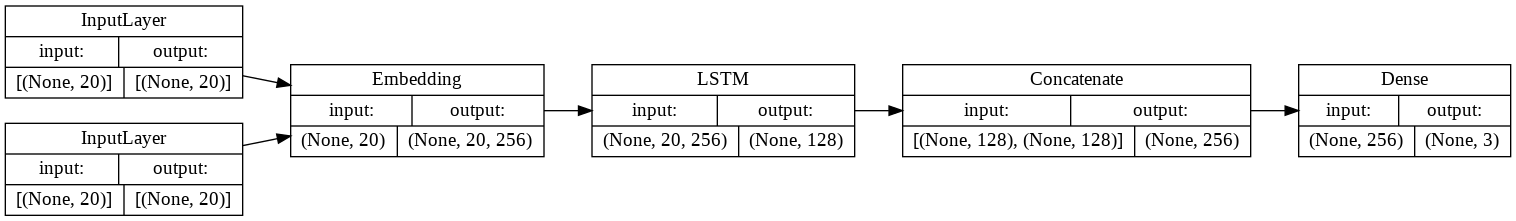

In [26]:
# Visualize the model bulit.
from keras.utils import plot_model
plot_model(model, 
    to_file='model.png', 
    show_shapes=True, 
    show_layer_names=False, 
    rankdir='LR')

In [27]:

BATCH_SIZE = 256
NUM_EPOCHS = 1000

# Training.
history = model.fit(
    x=[x1_train, x2_train], 
    y=y_train, 
    batch_size=BATCH_SIZE, 
    epochs=NUM_EPOCHS,
    validation_data=([x1_val, x2_val], y_val), 
    shuffle=True,
    callbacks=[EarlyStopping(monitor='val_acc', patience=3, verbose=1, mode="auto", restore_best_weights=True)])


Epoch 1/1000
1127/1127 [==============================] - 338s 297ms/step - loss: 0.8731 - acc: 0.6657 - val_loss: 0.6704 - val_acc: 0.6849
Epoch 2/1000
1127/1127 [==============================] - 335s 298ms/step - loss: 0.6361 - acc: 0.7057 - val_loss: 0.5500 - val_acc: 0.7572
Epoch 3/1000
1127/1127 [==============================] - 334s 297ms/step - loss: 0.5344 - acc: 0.7655 - val_loss: 0.4997 - val_acc: 0.7776
Epoch 4/1000
1127/1127 [==============================] - 334s 296ms/step - loss: 0.4867 - acc: 0.7862 - val_loss: 0.4751 - val_acc: 0.7852
Epoch 5/1000
1127/1127 [==============================] - 339s 300ms/step - loss: 0.4649 - acc: 0.7935 - val_loss: 0.4620 - val_acc: 0.7931
Epoch 6/1000
1127/1127 [==============================] - 336s 298ms/step - loss: 0.4477 - acc: 0.7998 - val_loss: 0.4485 - val_acc: 0.7974
Epoch 7/1000
1127/1127 [==============================] - 334s 297ms/step - loss: 0.4343 - acc: 0.8048 - val_loss: 0.4420 - val_acc: 0.7970
Epoch 8/1000
1127/11

In [28]:
# Test data pre-processing.
test = pd.read_csv(test_path, index_col=0)
test.head(3)

# Word Segmentation
test['title1_tokenized'] = test.loc[:, 'title1_zh'].astype(str).apply(jieba_tokenizer)
test['title2_tokenized'] = test.loc[:, 'title2_zh'].astype(str).apply(jieba_tokenizer)

# Words to index.
x1_test = tokenizer.texts_to_sequences(test.title1_tokenized)
x2_test = tokenizer.texts_to_sequences(test.title2_tokenized)

# Zero-padding.
x1_test = keras.preprocessing.sequence.pad_sequences(x1_test, maxlen=MAX_SEQUENCE_LENGTH)
x2_test = keras.preprocessing.sequence.pad_sequences(x2_test, maxlen=MAX_SEQUENCE_LENGTH)    

# Predict by trained model.
predictions = model.predict([x1_test, x2_test])

In [29]:
# Demo prediction.
predictions[:5]

array([[9.4182140e-01, 2.7491458e-04, 5.7903673e-02],
       [8.9084536e-01, 1.7768622e-03, 1.0737771e-01],
       [7.7478069e-01, 2.2507338e-01, 1.4591284e-04],
       [9.1811848e-01, 2.3914261e-03, 7.9490066e-02],
       [8.6049372e-01, 2.3202451e-03, 1.3718610e-01]], dtype=float32)

In [30]:
# Reverse the index to label.
index_to_label = {v: k for k, v in label_to_index.items()}

test['Category'] = [index_to_label[idx] for idx in np.argmax(predictions, axis=1)]

submission = test.loc[:, ['Category']].reset_index()

# Predicted label results.
submission.columns = ['Id', 'Category']
submission.head()


,Id,Category
0,321187,unrelated
1,321190,unrelated
2,321189,unrelated
3,321193,unrelated
4,321191,unrelated


In [31]:
# Actual labels.
sample_path = "/content/gdrive/MyDrive/Colab_Notebooks/WSDM_Fake_News_Classification/sample_submission.csv"
sample = pd.read_csv(sample_path)
sample.head()

,Id,Category
0,347448,unrelated
1,347449,unrelated
2,359100,unrelated
3,359101,unrelated
4,359102,unrelated


In [32]:
import math

# Caculate accuracy.
accuracy = 0
for i in range(len(submission["Category"].values)):
  if submission["Category"].values[i] == sample["Category"].values[i]:
    accuracy += (1/len(submission["Category"].values))
accuracy = round(accuracy, 3)
print(f"The accuracy of prediction is about {accuracy * 100} %. (round off to the 3rd decimal place)")



The accuracy of prediction is about 74.7 %. (round off to the 3rd decimal place)
